# DT Assignment

# Data Loading

In [1]:
import pandas as pd 
import numpy as np

In [2]:
pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data.drop("RID", axis=1, inplace = True)     #RID는 그냥 순서라서 삭제
pd_data

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


## Gini 계수를 구하는 함수 만들기

- Input: df(데이터), label(타겟변수명)
- 해당 결과는 아래와 같이 나와야 합니다.

In [3]:
def get_gini(df, label):
    target_count = len(df[label])     # target_count : (분류/예측하고자 하는) 전체 데이터 개수
    p_square_sum = 0     # p_square_sum : for 반복문에서 각 확률을 제곱(p_square)하여 합한(sum) 결과를 저장할 변수
    for i in list(df[label].value_counts()):     # df[label].value_counts() : 클래스별 데이터 개수를 리스트로 저장
        p_square_sum += (i / target_count)**2
    gini = 1 - p_square_sum
    return gini    

In [4]:
get_gini(pd_data, "class_buys_computer")

0.4591836734693877

In [5]:
get_gini(pd_data, "income")

0.653061224489796

## Feature의 Class를 이진 분류로 만들기
- ex) {A,B,C} -> ({A}, {B,C}), ({B}, {A,C}), ({C}, {A,B})

- Input: df(데이터), attribute(Gini index를 구하고자 하는 변수명)
- Income 변수를 결과로 출력해주세요.

In [6]:
from itertools import combinations     # 이진 분류를 위한 함수 호출

In [7]:
def get_binary_split(df, attribute):
    unique = list(df[attribute].unique())    # unique : 해당 attribute에 속한 데이터 중 고유값 추출, 리스트로 변환
    result = []
    for i in range(1, len(unique)):
        for j in range(len(list(combinations(unique, i)))):     # unique의 요소 중 가능한 조합을 모두 찾은 후,
            result.append(list(list(combinations(unique, i))[j]))     # 가능한 조합들을 리스트로 바꾸어 result에 요소로 추가
    return result

In [8]:
get_binary_split(pd_data, "income")

[['high'],
 ['medium'],
 ['low'],
 ['high', 'medium'],
 ['high', 'low'],
 ['medium', 'low']]

* 다른 변수에 `get_binary_split` 함수를 적용해도 잘 분류되는지 확인해보자.

In [9]:
# age 변수에 적용 - class가 3개인 경우

print(pd_data.age.unique())     # age 변수의 고유값 확인
print()
print(get_binary_split(pd_data, "age"))

['youth' 'middle_aged' 'senior']

[['youth'], ['middle_aged'], ['senior'], ['youth', 'middle_aged'], ['youth', 'senior'], ['middle_aged', 'senior']]


In [10]:
# credit_rating 변수에 적용 - class가 2개인 경우

print(pd_data.credit_rating.unique())     # credit_rating 변수의 고유값 확인
print()
print(get_binary_split(pd_data, "credit_rating"))

['fair' 'excellent']

[['fair'], ['excellent']]


In [11]:
# 일반화 가능 여부 확인 - class가 4개인 경우

ABCD_df = pd.DataFrame({"column" : ['A', 'B', 'C', 'D']})    # 임의로 class가 4개인 DataFrame 생성
print(ABCD_df)
print()
print("이진 분류 결과 :", get_binary_split(ABCD_df, "column"))

  column
0      A
1      B
2      C
3      D

이진 분류 결과 : [['A'], ['B'], ['C'], ['D'], ['A', 'B'], ['A', 'C'], ['A', 'D'], ['B', 'C'], ['B', 'D'], ['C', 'D'], ['A', 'B', 'C'], ['A', 'B', 'D'], ['A', 'C', 'D'], ['B', 'C', 'D']]


## 모든 이진분류의 경우의 Gini index를 구하는 함수 만들기
- 위에서 완성한 두 함수를 사용하여 만들어주세요!
- 해당 결과는 아래와 같이 나와야 합니다.

In [12]:
def get_attribute_gini_index(df, attribute, label):
    result = {}     # 딕셔너리형 변수 result 선언
    unique = list(df[attribute].unique())     # unique : 해당 attribute에 속한 데이터 중 고유값 추출, 리스트로 변환
    
    # result의 value 구하기
    for i in unique:
        gini_1 = get_gini(df[df[attribute] == i], label)     # 주어진 Attribute가 특정 값(i)을 가질 때 Gini 계수 구하기
        gini_2 = get_gini(df[df[attribute] != i], label)     # 주어진 Attribute가 특정 값(i)이 아닐 때 Gini 계수 구하기
        D = len(df[label])     # 전체 데이터 개수
        D_1 = sum(df[attribute] == i)     # 전체 데이터 개수 중 주어진 Attribute가 특정 값(i)인 데이터 개수
        D_2 = sum(df[attribute] != i)     # 전체 데이터 개수 중 주어진 Attribute가 특정 값(i)이 아닌 데이터 개수
        gini = (D_1 / D) * gini_1 + (D_2 / D) * gini_2     # Gini Index 구하는 공식
        result[i] = gini     # result에 요소(key : 이진 분류 결과 요소, value : 대응하는 Gini Index) 추가
    
    lst = get_binary_split(df, attribute)     # Attribute 이진 분류 결과
    
    # 이진 분류 결과에서 서로 대응되는 결과끼리는 Gini Index가 동일하다는 점을 이용
    # 예를 들어, Income Feature의 'high'에 대한 Gini Index는 'medium_low'에 대한 Gini Index와 동일함
    for j in unique:
        unique = list(df[attribute].unique())
        unique.remove(j)
        if unique in lst:
            result['_'.join(unique)] = result[j]
    
    return result

In [13]:
get_attribute_gini_index(pd_data, "income", "class_buys_computer")

{'high': 0.4428571428571429,
 'medium': 0.4583333333333333,
 'low': 0.45,
 'medium_low': 0.4428571428571429,
 'high_low': 0.4583333333333333,
 'high_medium': 0.45}

- 여기서 가장 작은 Gini index값을 가지는 class를 보여주세요.

In [14]:
min(get_attribute_gini_index(pd_data, "income", "class_buys_computer").items())

('high', 0.4428571428571429)

## 분류를 하는 데 가장 중요한 변수를 선정하고, 해당 변수의 Gini index를 제시해주세요.
- 모든 변수에 대한 Gini index(최소)를 출력해주세요.
- 해당 결과는 아래와 같이 나와야 합니다.

In [15]:
# 변수명 중 마지막에 위치한 label 컬럼 얻기

label = pd_data.columns[-1]

# label 변수를 제외한 변수명 얻기

features = list(pd_data.columns[:-1])

# 각 변수를 대상으로 반복문 수행(해당 변수 중 가장 낮은 gini 계수와 변수 출력)

for feature in features:
    print("Minimum Gini index of", feature, ":", min(get_attribute_gini_index(pd_data, feature, label).values()))

Minimum Gini index of age : 0.35714285714285715
Minimum Gini index of income : 0.4428571428571429
Minimum Gini index of student : 0.3673469387755103
Minimum Gini index of credit_rating : 0.42857142857142855


In [16]:
# 위의 결과를 소수점 이하 4자리까지 출력

for feature in features:
    print("Minimum Gini index of", feature, ":", round(min(get_attribute_gini_index(pd_data, feature, label).values()), 4))

Minimum Gini index of age : 0.3571
Minimum Gini index of income : 0.4429
Minimum Gini index of student : 0.3673
Minimum Gini index of credit_rating : 0.4286


## 위에서 선정한 feature로 DataFrame을 split한 후 나눠진 2개의 DataFrame에서 각각 다음으로 중요한 변수를 선정하고 해당 변수의 Gini index를 제시해주세요.

* 2.4에서 Gini Index가 최소인 Feature은 `age`임을 확인했다.
* `age`의 이진 분류에 따른 각각의 Gini Index를 계산하고, 마찬가지로 대응하는 Gini Index가 최소인 경우를 찾아 DataFrame을 분할해보자.

In [17]:
get_attribute_gini_index(pd_data, "age", "class_buys_computer")     # age의 이진 분류에 따른 Gini Index

{'youth': 0.3936507936507937,
 'middle_aged': 0.35714285714285715,
 'senior': 0.45714285714285713,
 'middle_aged_senior': 0.3936507936507937,
 'youth_senior': 0.35714285714285715,
 'youth_middle_aged': 0.45714285714285713}

In [18]:
print("age에서 최소 Gini Index를 지니는 Class : ", min(get_attribute_gini_index(pd_data, "age", "class_buys_computer").items()))

age에서 최소 Gini Index를 지니는 Class :  ('middle_aged', 0.35714285714285715)


In [19]:
# age의 middle_aged 클래스에 따라 DataFrame 분할하기

df_1 = pd_data[pd_data["age"] == "middle_aged"]     # df_1 : age가 middle_aged인 DataFrame
df_2 = pd_data[pd_data["age"] != "middle_aged"]     # df_2 : age가 youth, senior인 DataFrame

print("<age가 middle_aged인 DataFrame>")
print(df_1)
print('-'*70)
print("<age가 youth, senior인 DataFrame>")
print(df_2)

<age가 middle_aged인 DataFrame>
            age  income student credit_rating class_buys_computer
2   middle_aged    high      no          fair                 yes
6   middle_aged     low     yes     excellent                 yes
11  middle_aged  medium      no     excellent                 yes
12  middle_aged    high     yes          fair                 yes
----------------------------------------------------------------------
<age가 youth, senior인 DataFrame>
       age  income student credit_rating class_buys_computer
0    youth    high      no          fair                  no
1    youth    high      no     excellent                  no
3   senior  medium      no          fair                 yes
4   senior     low     yes          fair                 yes
5   senior     low     yes     excellent                  no
7    youth  medium      no          fair                  no
8    youth     low     yes          fair                 yes
9   senior  medium     yes          fair         

In [20]:
# 각 변수를 대상으로 반복문 수행
# 결과는 소수점 이하 4자리까지 출력

rest_features = ["income", "student", "credit_rating"]     # Gini Index를 계산할 변수들만 모아서 리스트 생성

for feature in rest_features:
    print("Age : Middle_aged,", "Minimum Gini index of", feature, ":", round(min(get_attribute_gini_index(df_1, feature, label).values()), 4))

print("#############################################################")

for feature in rest_features:
    print("Age : Middle_aged,", "Minimum Gini index of", feature, ":", round(min(get_attribute_gini_index(df_2, feature, label).values()), 4))

Age : Middle_aged, Minimum Gini index of income : 0.0
Age : Middle_aged, Minimum Gini index of student : 0.0
Age : Middle_aged, Minimum Gini index of credit_rating : 0.0
#############################################################
Age : Middle_aged, Minimum Gini index of income : 0.375
Age : Middle_aged, Minimum Gini index of student : 0.32
Age : Middle_aged, Minimum Gini index of credit_rating : 0.4167


## Entropy 를 구하는 함수 만들기
* 참고 : Entropy Formula (출처 : https://towardsdatascience.com/entropy-is-a-measure-of-uncertainty-e2c000301c2c)
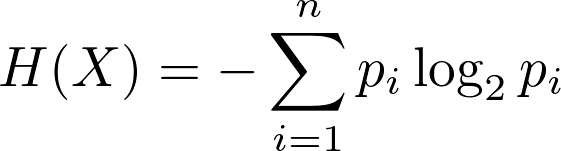

In [21]:
def getEntropy(df, feature):
    entropy = 0     # entrophy 변수 선언
    unique = list(df[feature].unique())     # Feature가 가질 수 있는 value 중 unique한 value만 추출, 리스트로 저장
    
    for i in unique:
        # prob : 해당 Feature가 특정 값(i)을 가지는 데이터 개수 / Feature의 전체 데이터 개수
        prob = sum(df[feature] == i) / len(df[feature])
        entropy -= prob * np.log2(prob)
        
    return entropy

In [22]:
getEntropy(pd_data, "class_buys_computer")

0.9402859586706311

In [23]:
def getGainA(df, feature) :
    result = {}     # 딕셔너리형 변수 result 선언
    info_D = getEntropy(df, feature)    # 목표변수에 대한 Entropy 구하기
    columns = list(df.loc[:, df.columns != feature])     # 목표변수(feature)를 제외한 나머지 변수들의 변수명을 리스트 형태로 저장
    
    for i in columns:     # Column별로 반복
        pre_info = 0     # 가중치 * Entropy를 저장할 변수 pre_info 선언
        for j in list(df[i].unique()):
            S = len(df[feature])     # S : 전체 데이터 개수
            S_j = sum(df[i] == j)     # S_j : 전체 데이터 중 i 컬럼의 값이 j인 데이터의 개수 (= 가중치)
            pre_info += (S_j / S) * getEntropy(df[df[i] == j], feature)   # pre_info에 가중치 * Entropy 누적합 저장
        result[i] = info_D - pre_info   # 최종 결과는 목표변수의 Entropy - pre_info
        
    return result

In [24]:
getGainA(pd_data, "class_buys_computer")

{'age': 0.24674981977443933,
 'income': 0.02922256565895487,
 'student': 0.15183550136234159,
 'credit_rating': 0.04812703040826949}